In [40]:
import numpy as np
import matplotlib.pyplot as plt

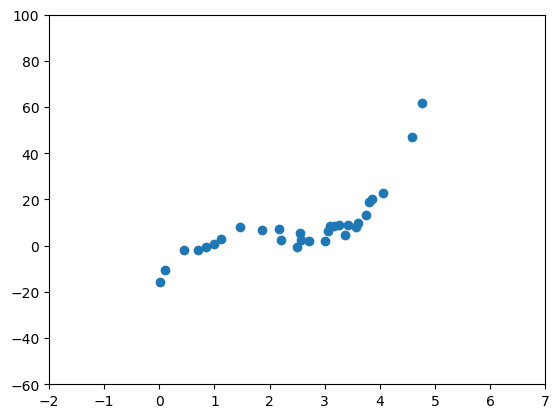

In [60]:
np.random.seed(10)

X_train = np.random.rand(30, 1) * 5
y_train = 3 * (X_train - 1) * (X_train - 2) * (X_train - 3) + 8 * np.random.rand(30, 1)
y_train = np.ravel(y_train)

plt.axis([-2, 7, -60, 100])
plt.scatter(X_train, y_train);

In [72]:
def buildX(deg):
    res = np.ones((X_train.shape[0], 1))
    
    for i in range(1, deg + 1):
        res = np.concatenate((res, X_train ** i), axis=1)
        
    return res

In [104]:
def predict_no_regularization(deg):
    X = buildX(deg)
    w = np.linalg.pinv(X.T @ X) @ X.T @ y_train
    
    X0 = np.linspace(-1, 7, 200)
    y0 = np.zeros_like(X0)
    
    for i in range(len(X0)):
        for j in range(len(w)):
            y0[i] += w[j] * X0[i] ** j
             
    plt.plot(X0, y0, c="r")
    plt.axis([-2, 7, -60, 100])
    plt.scatter(X_train, y_train);

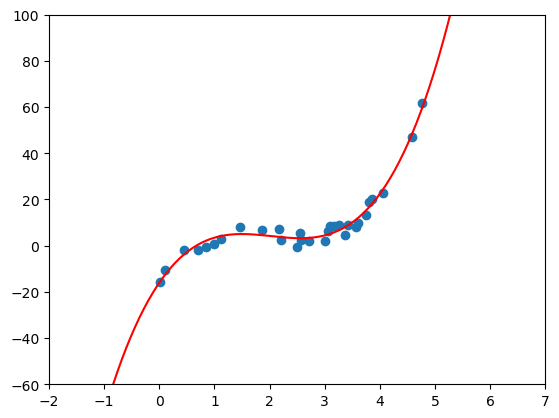

In [213]:
predict_no_regularization(3)

In [211]:
from sklearn.linear_model import Ridge


def predict_regularization(deg):
    X = buildX(deg)
    identity = np.identity(X.shape[1])
    # 4 * n @ n * 4 = 4 * 4
    
    r = Ridge(10, fit_intercept=False)
    r.fit(X, y_train)
    
    wsk = r.coef_
    wr = np.linalg.pinv(X.T @ X + 10 * identity) @ X.T @ y_train
    w = np.linalg.pinv(X.T @ X) @ X.T @ y_train
    
    # print(r.coef_)
    # print(w)
    # print(wr)
    
    X0 = np.linspace(-1, 7, 200)
    y0 = np.zeros_like(X0)
    y0r = np.zeros_like(X0)
    y0sk = np.zeros_like(X0)
    
    for i in range(len(X0)):
        for j in range(len(w)):
            y0[i] += w[j] * X0[i] ** j
            y0r[i] += wr[j] * X0[i] ** j
            y0sk[i] += wsk[j] * X0[i] ** j
             
    plt.plot(X0, y0, c="r")
    plt.plot(X0, y0r, c="g")
    plt.plot(X0, y0sk, c="b")
    plt.axis([-2, 7, -60, 100])
    plt.scatter(X_train, y_train);

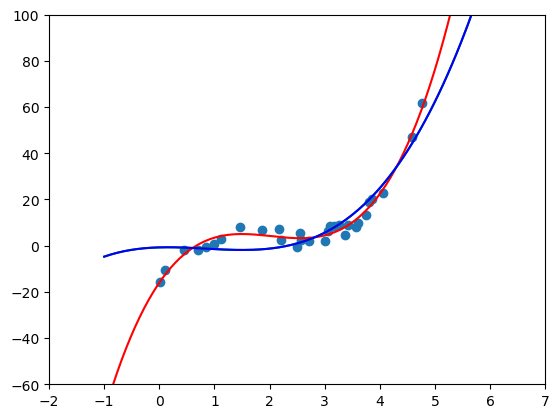

In [212]:
predict_regularization(3)